In [1]:
%pylab inline
import sys
sys.path.insert(0, "/Users/helenarichie/Documents/Grad School/Semester 2/Classes/Astronomical Techniques/Notebooks/python")
pylab.rcParams.update({'font.size': 18})
pylab.rcParams.update({'font.family': 'serif'})
pylab.rcParams.update({'mathtext.default':'regular'})
pylab.rcParams.update({'mathtext.fontset':'stixsans'})
pylab.rcParams.update({'axes.linewidth': 1.5})
pylab.rcParams.update({'xtick.direction':'in'})
pylab.rcParams.update({'xtick.major.size': 5})
pylab.rcParams.update({'xtick.major.width': 1.25 })
pylab.rcParams.update({'xtick.minor.size': 2.5})
pylab.rcParams.update({'xtick.minor.width': 1.25 })
pylab.rcParams.update({'ytick.direction':'in'})
pylab.rcParams.update({'ytick.major.size': 5})
pylab.rcParams.update({'ytick.major.width': 1.25 })
pylab.rcParams.update({'ytick.minor.size': 2.5})
pylab.rcParams.update({'ytick.minor.width': 1.25 })

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.stats as stats
import numpy.random as random
import scipy.interpolate as interpol
import scipy.integrate as integrate

# Test case for today: log-normal data

Let's create $10^6$ values distributed as a log-normal: $x \sim e^{N(0,1)}$

In [3]:
data = exp(random.randn(100_000))

__In the below code box, plot a histogram of the array `data` as one figure (using `plt.figure()`) and a histogram of the log of the data as a second figure.  Use 100 bins for each plot.__

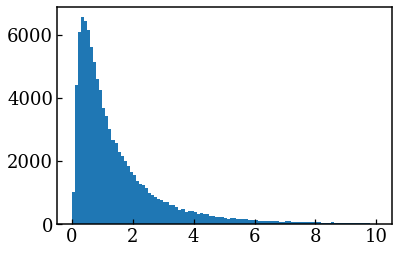

In [4]:
plt.hist(data, bins=100, range=(0, 10)) # median of 1 ~ exp(0) ~ Gaussian with zero mean
plt.show()

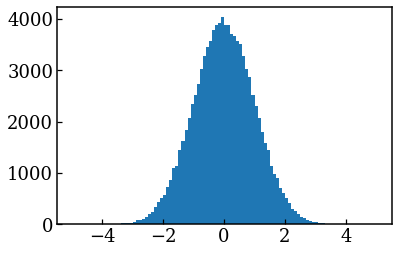

In [5]:
plt.hist(np.log(data), bins=100, range=(-5, 5)) # median of 1 ~ exp(0) ~ Gaussian with zero mean
plt.show()

Calculating the mean:

In [6]:
print(np.mean(data))
print( data.mean() )

1.6471351909882588
1.6471351909882588


Calculating the median:

In [7]:
print(np.median(data))

0.9956867230791243


Calculating the mode:

In [8]:
print(f'Unrounded: {stats.mode(data)}')

data_r = np.round(data, decimals=2)
print(f'Rounded: {stats.mode(data_r)}')

Unrounded: ModeResult(mode=array([0.00833477]), count=array([1]))
Rounded: ModeResult(mode=array([0.44]), count=array([705]))


In [9]:
bins = np.linspace(-0.005,10.005,1002)
counts,edges=np.histogram(data,bins=bins)
whmax=np.argmax(counts)
mode=(edges[whmax]+edges[whmax+1])/2
print(mode)

0.44000000000000006


## Creating a mode function

Let's define a function which can calculate the mode for any binning we might choose at the time we run it:

In [10]:
def mode2(data,**kwargs):
# note: provide bins and (optionally) range keywords 
# as used in np.histogram to not use the
# defaults of np.histogram (10 bins, full range)
    counts,edges=np.histogram(data,**kwargs)
    whmax=np.argmax(counts)
    mode=(edges[whmax]+edges[whmax+1])/2
    return(mode)

__Use the `mode2` function to calculate the mode for at least 3 different binnings of the data (differing in bin sizes).__  Since we used `**kwargs` we can include the `bins=` keyword within the `mode2` function call, and it gets passed to `np.histogram`.

0.35000000000000003 0.35 0.34500000000000003


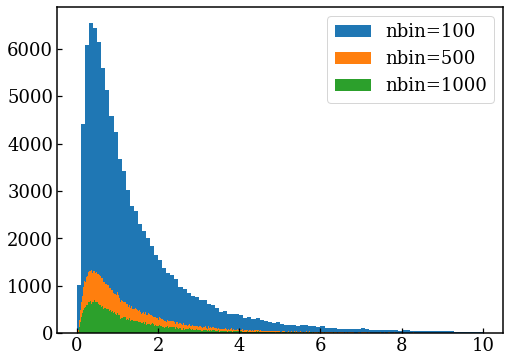

In [11]:
bin1, bin2, bin3 = 100, 500, 1000
mode_1 = mode2(data, bins=bin1, range=(0, 10))
mode_2 = mode2(data, bins=bin2, range=(0, 10))
mode_3 = mode2(data, bins=bin3, range=(0, 10))
print(mode_1, mode_2, mode_3)
fig = plt.figure(figsize(8, 6))
plt.hist(data, bin1, range=(0, 10), label=f"nbin={bin1}")
plt.hist(data, bin2, range=(0, 10), label=f"nbin={bin2}")
plt.hist(data, bin3, range=(0, 10), label=f"nbin={bin3}")
plt.legend()
plt.show()

# Calculating measures of scale

First, the standard deviation:


In [12]:
print(np.std(data), np.std(data,ddof=1))
print(np.std(log(data)), np.std(log(data),ddof=1))

2.1236842486393908 2.1236948671402724
1.000718045593478 1.0007230492212333


### Now, the mean absolute deviation.  

__Discuss with your group: why do these values agree or not with the standard deviation?__


In [13]:
normmeanabsdev = np.mean(np.abs(data-data.mean())) / 0.7979
mnlog = np.mean(np.log(data))
normmeanabsdev_log = np.mean(np.abs( np.log(data)-mnlog)) / 0.7979

print(f'Normalized Mean Absolute Deviation: {normmeanabsdev:.5f}')
print(f'Normalized Mean Absolute Deviation of log(data): {normmeanabsdev_log:.5f}')

Normalized Mean Absolute Deviation: 1.58115
Normalized Mean Absolute Deviation of log(data): 1.00229


### Calculating the MAD:

__Discuss with your group: why do these values agree or not with the standard deviation?__


In [14]:
meddata=np.median(data)
normmad = np.median(np.abs(data-meddata))/0.6745
normmad_log = np.median(abs(np.log(data)-np.log(meddata)))/0.6745

print(f'Normalized Median Absolute Deviation: {normmad:.5f}')
print(f'Normalized Median Absolute Deviation of log(data): {normmad_log:.5f}')

Normalized Median Absolute Deviation: 0.88956
Normalized Median Absolute Deviation of log(data): 1.00367


### Calculating the IQR:

__Discuss with your group: why do these values agree or not with the standard deviation?__

In [15]:
d25,d75 = np.percentile(data,[25,75])
normiqr = (d75-d25)/1.349
normiqr_log = (np.log(d75)-np.log(d25))/1.349


print(f'Normalized IQR: {normiqr:.5f}')
print(f'Normalized IQR of log(data): {normiqr_log:.5f}')

Normalized IQR: 1.08215
Normalized IQR of log(data): 1.00431


# Results when averaging data together

In [19]:
nsims=int(1E5)
navg=100
data=random.randn(nsims,navg)
nrange=(-2, 2)
nbins = int(100/0.01)

# average each set of navg values
means=np.mean(data,axis=1)

- __Using the below code block, plot a histogram of the distribution of the means from each simulation, with binsize 0.01, over the range from -2 to +2 (what should you set the `bins` and `range` keywords to be for that?)__

- __Determine the standard deviation of the array of means__

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([-2.    , -1.9996, -1.9992, ...,  1.9992,  1.9996,  2.    ]),
 <BarContainer object of 10000 artists>)

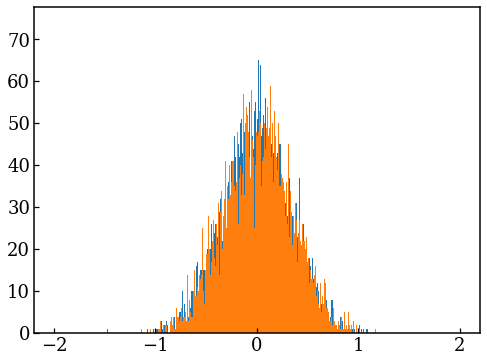

In [21]:
nsims=int(1E5)
navg=9
data1=random.randn(nsims,navg)

# average each set of navg values
means1=np.mean(data1,axis=1)
plt.hist(means, range=nrange, bins=nbins)
plt.hist(means1, range=nrange, bins=nbins)

- __Now, in the above code box, create a second set of simulations with `navg` = 9.  Plot the histogram of results from these simulations on top of the histogram for averaging 100 measurements.__

__Discuss with your group: How do you explain the differences between the results (both qualitatively and quantitatively)? How does the scatter of the means scale with `navg`?__